# Flight Price Prediction (Suprevised Regression Problem Statement)

# Steps :
1. Importing the Libraries
2. Importing Dataset
3. Training Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Handling Categorical Data
6. Testing Data Preprocessing
7. Feature Selection
8. Model Creation and Evalution
9. Front-End Creation
10. Deployment

# Importing Required Libraries :
1. Numpy : For calculations and numerical process
2. Pandas : Data Analysis and Manipulation
3. Matplotlib : Data Visualisation
4. Seaborn : Data Visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
df = pd.read_excel('Data_Train.xlsx')

**Printing First five rows of the Training Data**

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**count of rows and columns of dataset**

In [4]:
print('Rows of dataset :', df.shape[0])
print('Columns of dataset :', df.shape[1])

Rows of dataset : 10683
Columns of dataset : 11


# Training Data Pre-processing

**Information of the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Observation** - All the columns except label column has object datatype. To perform ML operation on it first we need to convert these columns into int.

**Checking missing values**

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Observation** - Only Route and Total_Stops has one-one missing value respective. We can drop these records from the dataset. It won't create much effect on model because we are dropping only 2 rows from dataset.

**Handling Missing Values**

In [7]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

**Observation** - Now dataset has 0 null values

# Explorarory Data Analysis

**Performing feature engineering on Date_of_Journey, Arrival_Time, Dep_Time and Duration column**

**converting Date_of_Journey column into datetime type using pd.to_datetime()**

In [8]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Date_of_Journey'].dtypes

dtype('<M8[ns]')

**Adding new column 'Journey_day', 'Journey_month' and 'Journey_year' to the dataset.**

In [9]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
# df['Journey_year'] = df['Date_of_Journey'].dt.year

**Droping the 'Date_of_Journey' column because it is of no use.**

In [10]:
df.drop(['Date_of_Journey'], axis=1, inplace = True)

In [11]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


**Converting Arrival Time and Dep Time into numerical type**

In [12]:
# Arrival Time
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [13]:
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_min'] = df['Arrival_Time'].dt.minute

In [14]:
# Departure time
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [15]:
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_min'] = df['Dep_Time'].dt.minute

**Droping Arrival_Time and Dep Time Column because it is of no use.**

In [16]:
df.drop(['Arrival_Time','Dep_Time' ], axis = 1, inplace = True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


**Converting 'Duration' column into numerical column as 'Duration_minutes'.**

In [18]:
lst = list(df['Duration'])
lst
Duration_minutes = []

In [19]:
for i in range (len(lst)):
    if len(lst[i].split()) != 2:
#         print(i)
        if 'h' in lst[i]:
            Duration_minutes.append(int(lst[i].split('h')[0])*60)
        else:
            Duration_minutes.append(int(lst[i].split('m')[0]))
    else:
        Duration_minutes.append(int(lst[i].split('h')[0])*60 + int(lst[i].split('m')[0].split()[-1]))
# print(Duration_minutes)
df['Duration_minutes'] = Duration_minutes

**Dropping Duration Column as it is of no use.**

In [20]:
df.drop(['Duration'], axis=1, inplace=True)

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,1140


**Total_Stops mapping with numerical values w.r.t the no. of stops. eg '1 stop' = 1, '2 stop' = 2**

In [22]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [23]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [24]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

**Analysis on 'Additional_Info' column.**

In [25]:
df['Additional_Info'].value_counts(normalize=True)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

**Observation : More than 78% records are null so it is better to drop this column.**

In [26]:
df.drop(['Additional_Info'], axis = 1, inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,6,9,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,12,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,3,1,21,35,16,50,285


**Performing encoding on source and Destination Column.**

## Encoding
1. Label Encoding = We use these when we have Ordinal Data in our Dataset.
2. OneHot Encoding = We use these when we have Nominal Data in our Dataset.

**Encoding on Source Column**

In [28]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

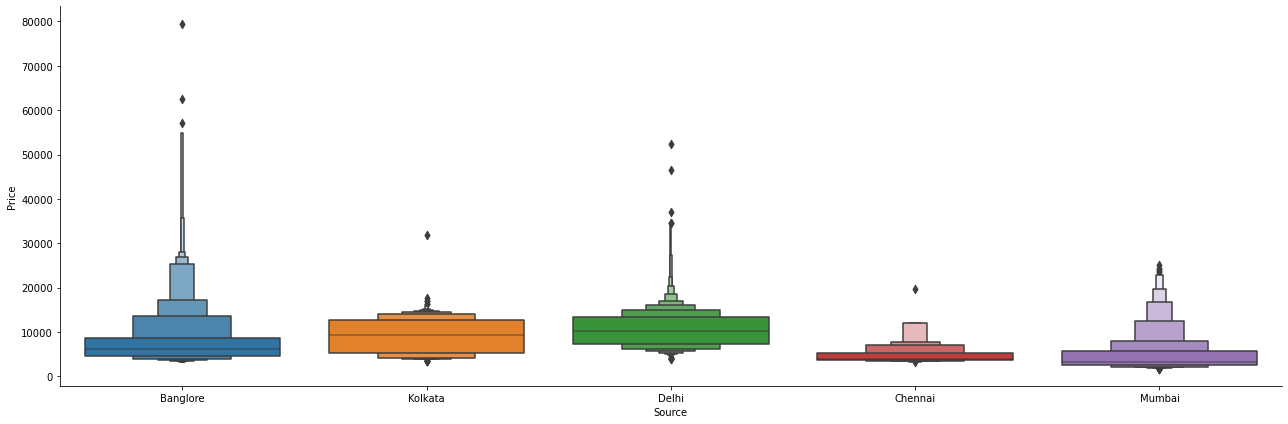

In [29]:
sns.catplot(x='Source', y='Price', data = df, kind='boxen', aspect =3, height = 6)

In [30]:
source = df['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


**Encoding on Destination Column**

In [31]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

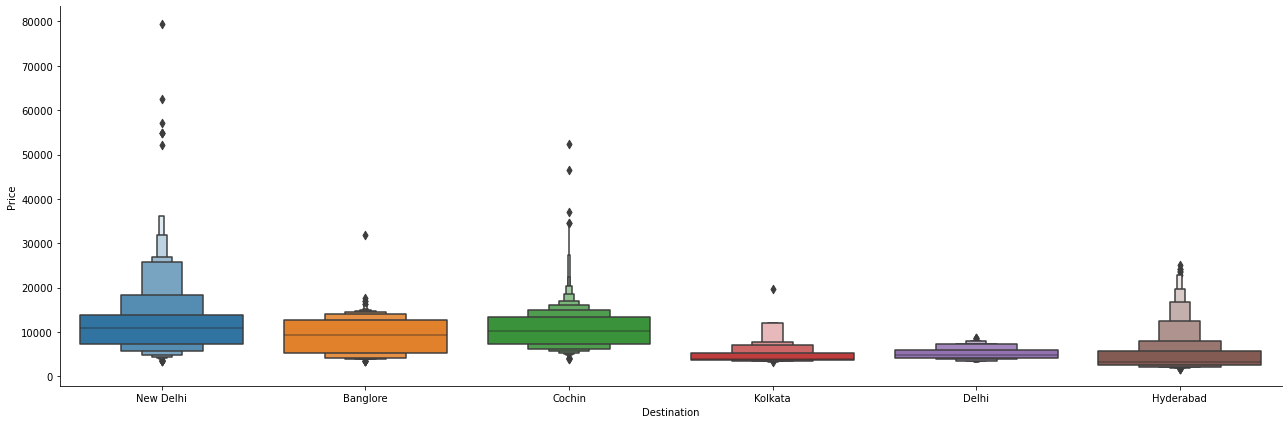

In [32]:
sns.catplot(x = 'Destination', y='Price', data = df, kind = 'boxen', aspect = 3, height = 6)

In [33]:
Destination = df['Destination']
Destination = pd.get_dummies(Destination , drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


**Checking Destribution od airline column.**

In [34]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

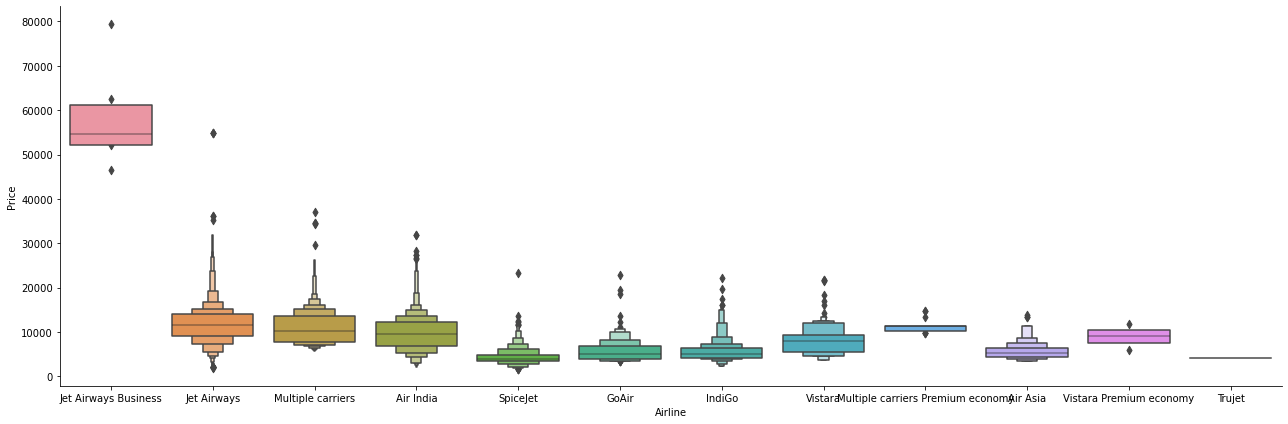

In [35]:
# Visualization of the airline vs price
sns.catplot(x = 'Airline', y='Price', data=df.sort_values('Price', ascending=False), kind = 'boxen', aspect=3, height=6)

**Performing Onehot encoding on Airline column.**

In [36]:
airlines = df['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


**Checking relation between Route and Total_Stops.**

In [37]:
df[['Route', 'Total_Stops']].head(10)

,Route,Total_Stops
0,BLR → DEL,0
1,CCU → IXR → BBI → BLR,2
2,DEL → LKO → BOM → COK,2
3,CCU → NAG → BLR,1
4,BLR → NAG → DEL,1
5,CCU → BLR,0
6,BLR → BOM → DEL,1
7,BLR → BOM → DEL,1
8,BLR → BOM → DEL,1
9,DEL → BOM → COK,1


**Observation : Actually both columns are representing same information so we can drop the Route column.**

In [38]:
df.drop(columns=['Route'], axis = 1, inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,5,1,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,21,35,16,50,285


In [40]:
df.drop(['Airline','Source', 'Destination' ], axis = 1, inplace = True)

In [41]:
training_dataset = pd.concat([df, airlines, source, Destination], axis = 1)
training_dataset.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,285,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
print('Shape of the Dataset :', training_dataset.shape)
training_dataset.head()

Shape of the Dataset : (10682, 29)


,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,285,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
training_dataset.shape

(10682, 29)

# Test Dataset Preprocessing

**Loading test dataset**

In [44]:
test_df = pd.read_excel('test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
test_df.shape

(2671, 10)

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


**checking null values**

In [47]:
test_df.isnull().sum().sum()

0

**Converting date of journey into numerical col**

In [48]:
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'])
test_df['Journey_day'] = test_df['Date_of_Journey'].dt.day
test_df['Journey_month'] = test_df['Date_of_Journey'].dt.month
# test_df['Journey_year'] = test_df['Date_of_Journey'].dt.year

In [49]:
test_df.drop(['Date_of_Journey'], axis=1, inplace = True)
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


**Feature engineering on arrival time and departure time**

In [50]:
# Arrival Time
test_df['Arrival_Time'] = pd.to_datetime(test_df['Arrival_Time'])
test_df['Arrival_hour'] = test_df['Arrival_Time'].dt.hour
test_df['Arrival_min'] = test_df['Arrival_Time'].dt.minute

In [51]:
# Departure time
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'])
test_df['Dep_hour'] = test_df['Dep_Time'].dt.hour
test_df['Dep_min'] = test_df['Dep_Time'].dt.minute

In [52]:
test_df.drop(['Arrival_Time','Dep_Time' ], axis = 1, inplace = True)
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


**Converting Duration into Duration min.**

In [53]:
lst1 = list(test_df['Duration'])
lst1
Duration_minutes = []

In [54]:
for i in range (len(lst1)):
    if len(lst1[i].split()) != 2:
#         print(i)
        if 'h' in lst1[i]:
            Duration_minutes.append(int(lst1[i].split('h')[0])*60)
        else:
            Duration_minutes.append(int(lst1[i].split('m')[0]))
    else:
        Duration_minutes.append(int(lst1[i].split('h')[0])*60 + int(lst1[i].split('m')[0].split()[-1]))
# print(Duration_minutes)
test_df['Duration_minutes'] = Duration_minutes

In [55]:
test_df.drop(['Duration'], axis=1, inplace=True)
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,45,23,55,170


In [56]:
test_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [57]:
test_df['Total_Stops'] = test_df['Total_Stops'].map({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [58]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,5,12,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,2,45,23,55,170


In [59]:
test_df['Additional_Info'].value_counts(normalize=True)

No info                         0.804193
In-flight meal not included     0.166230
No check-in baggage included    0.028454
1 Long layover                  0.000374
Business class                  0.000374
Change airports                 0.000374
Name: Additional_Info, dtype: float64

In [60]:
test_df.drop(['Additional_Info'], axis = 1, inplace=True)

In [61]:
test_df['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [62]:
source = test_df['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [63]:
test_df['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [64]:
Destination = test_df['Destination']
Destination = pd.get_dummies(Destination , drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [65]:
test_df.drop(columns=['Route'], axis = 1, inplace=True)

In [66]:
test_df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [67]:
airlines = test_df['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines["Trujet"] = 0
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [68]:
test_df.drop(['Airline','Source', 'Destination' ], axis = 1, inplace = True)

In [69]:
test_dataset = pd.concat([test_df, airlines, source, Destination], axis =1)
test_dataset.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes,Air India,GoAir,...,Trujet,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,655,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,10,20,6,20,240,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,1425,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,780,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,170,0,0,...,0,0,0,0,0,0,1,0,0,0


**Final Test Dataset**

In [70]:
test_dataset.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes,Air India,GoAir,...,Trujet,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,655,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,10,20,6,20,240,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,1425,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,780,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,170,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
test_dataset.shape

(2671, 28)

# Future Selection

**Here, we find out the best features for training the model and also see at what extent they contribute to our fare detection. We do these by**
1. Heatmap
2. Feature_importances_

In [72]:
training_dataset.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_minutes', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

**Heatmap**

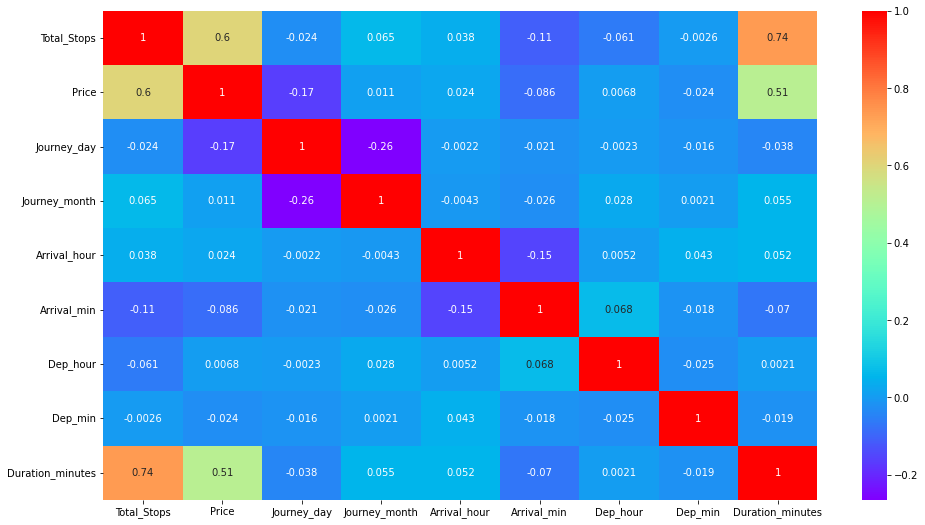

In [73]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.show()

**Extracting X (independent variable) and y (dependent variable)** 

In [74]:
X = training_dataset.drop(columns=['Price'], axis = 1)
y = training_dataset['Price']

In [75]:
X.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_minutes,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,1,10,22,20,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,13,15,5,50,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,4,25,9,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,23,30,18,5,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,21,35,16,50,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
pd.DataFrame(y.head())

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


**Extracting important features using ExtraTreesRegresser**

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

imp_features = ExtraTreesRegressor()
imp_features.fit(X,y)
print(imp_features.feature_importances_)

[2.18052551e-01 1.10950011e-01 8.35873579e-02 3.00938336e-02
 2.42689066e-02 2.72610757e-02 2.65454173e-02 1.40075560e-01
 9.88583428e-03 1.88482826e-03 1.58343064e-02 1.42928560e-01
 6.65529378e-02 2.10835051e-02 9.59838868e-04 3.17324131e-03
 8.35404416e-05 5.21213895e-03 1.15176272e-04 4.06682746e-04
 9.27375619e-03 4.40777454e-03 6.21755871e-03 9.02143489e-03
 1.29390971e-02 6.12983886e-03 5.42551476e-04 2.25126848e-02]


**Visualizing the feature importances**

<AxesSubplot:>

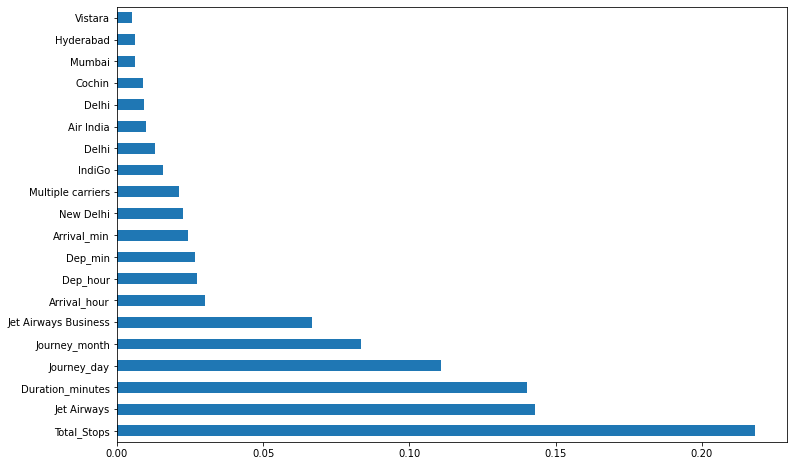

In [78]:
plt.figure(figsize = (12, 8))
columns = training_dataset.drop("Price", axis = 1).columns
fseries = pd.Series(imp_features.feature_importances_, index = columns)
fseries.nlargest(20).plot(kind = "barh")

# Model Fitting

1. Split data into train and test so as to predict w.r.t. 'X_test'.
2. Import the model(which suits the data most or gives better results)
3. Fit training data into it
4. Predict w.r.t. 'X_test' (compare with 'Y_test')
5. In regression models check **RMSE** score
6. Plot final graphs

**Splitting data into train and test split**

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [80]:
print('Training set :\nX', X_train.shape, '\nX', y_train.shape)
print()
print('Training set :\nX', X_test.shape, '\nX', y_test.shape)

Training set :
X (8545, 28) 
X (8545,)

Training set :
X (2137, 28) 
X (2137,)


# Importing Regression Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

**Creating model using multiple linear regression**

In [82]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

**Finding the coefficient and intercept for plotting the regression line**

In [83]:
coefficent = pd.Series(linear_regression.coef_, index=columns)
print('Coefficent :',coefficent)
print()
intercept = linear_regression.intercept_
print('Intercept :',intercept)

Coefficent : Total_Stops                           2624.178364
Journey_day                            -77.177498
Journey_month                          -91.945642
Arrival_hour                            -8.579744
Arrival_min                              3.617890
Dep_hour                                17.707781
Dep_min                                 -1.183362
Duration_minutes                         0.157981
Air India                             1603.318544
GoAir                                  145.662539
IndiGo                                 332.975211
Jet Airways                           4332.277984
Jet Airways Business                 48257.179889
Multiple carriers                     3783.489661
Multiple carriers Premium economy     5149.328053
SpiceJet                              -213.525950
Trujet                               -1852.196069
Vistara                               2205.280963
Vistara Premium economy               2992.941527
Chennai                              

**Predicting the values of the target variable for test set**

In [84]:
y_pred = linear_regression.predict(X_test)
print("Predicted values for the Test Set\n", y_pred[:100])

Predicted values for the Test Set
 [ 4122.33254684  2113.80462659  7706.11753034  6525.2357164
 15122.72877164  7690.25651762  6582.78885123 13252.51378066
  6730.00923736 10539.46375083  7615.35085814  4487.30906924
  4374.83655601  4514.27061977  9927.1198666   6003.13919912
  8260.50255696 15047.79735459 10563.92035174  3429.61123936
 11453.70250415  7132.83226554  4230.7800693   8674.76414146
  6273.79710476  4621.0560089   7270.57543903  4335.54804445
  7301.70799222  2786.13995846 10803.02297316  4312.29217017
 10915.87124211 12351.82560782 12110.94528973 11633.25201087
 13052.86352832  7847.06179518  5331.61339399 12089.39073412
  6539.51028904  7557.5859066  11038.39053339  3761.26324319
 14672.13381746 11736.31921893  4157.15737689 11398.07851363
 10151.46407851 12271.56105751 14027.1021159   4307.35132429
  1950.82028246  7096.35149085 10650.83360013  6830.56427357
 10083.51328013 14336.26787708  5889.19189272 10765.55704092
  9777.4457895  13374.72503022 11572.53409899 12128

In [85]:
linear_regression.score(X_train, y_train)

0.6201282100355725

In [86]:
linear_regression.score(X_test, y_test)

0.6090654995465111

**Visualizing the distribution of difference in the actual value and predicted value**

Text(0, 0.5, 'Count')

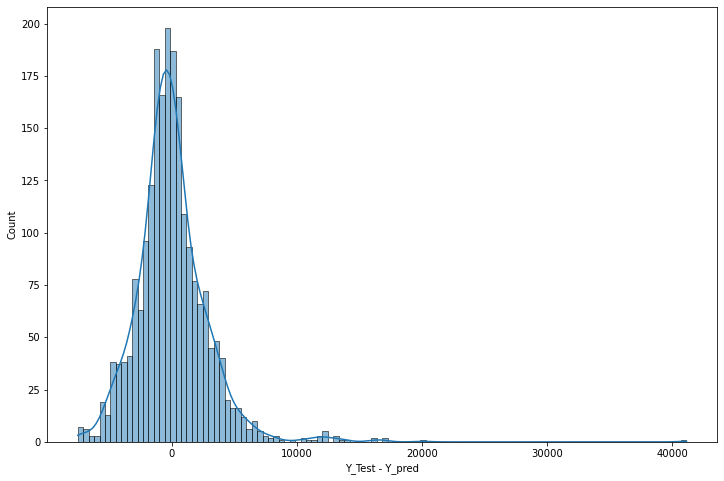

In [87]:
plt.figure(figsize = (12, 8))
sns.histplot(y_test - y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

**Importing and Evaluating the predictions using metrices**

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print('mean_absolute_error :', mae)

mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error :', mse)

r2_scr  = r2_score(y_test, y_pred)
print('r2_score :', r2_scr)

print('Root Mean Squared Error :', np.sqrt(mse))

mean_absolute_error : 2019.2712827430846
mean_squared_error : 8729713.210584648
r2_score : 0.6090654995465111
Root Mean Squared Error : 2954.608808384732


# Random Forest Regressor 

**Creating model with Random Forest Regression**

In [89]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

**Predicting the values of the target variable for test set**

In [90]:
y_pred = rf_model.predict(X_test)
print("Predicted values for the Test Set\n", y_pred[:100])

Predicted values for the Test Set
 [ 5339.14533333  3646.85        7564.05        6373.07
 21306.1         8670.645       7280.46        7832.
  6422.725      12337.25416667 10092.53        4443.27
  6746.21        3966.81       10540.64595238  5374.36166667
  4363.27       12009.484      10290.44        4472.71
 10425.21        6510.53        5388.96        9177.61
  6577.77        3559.01666667  5845.19        3898.66
  5647.32        4852.59       13748.09        4797.03
 13022.78083333  9942.31       15593.89366667 13489.8475
 17137.48        7728.59        3934.28666667 11261.29833333
  6406.08        7270.72       13695.57        3991.62883333
 17231.175      12168.09907143  5242.44333333 13117.2745
  8448.2925     10843.05       36986.26        3296.84
  3652.23457143  6989.34       10851.85        7255.25
 14006.8225     11043.01        6174.53       11089.28
  8727.881      12279.23733333 15232.18        9828.66
  4861.79        9116.65666667  5287.2        14597.89
  3632.45 

**Visualizing the distribution of difference in the actual value and predicted value**

Text(0, 0.5, 'Count')

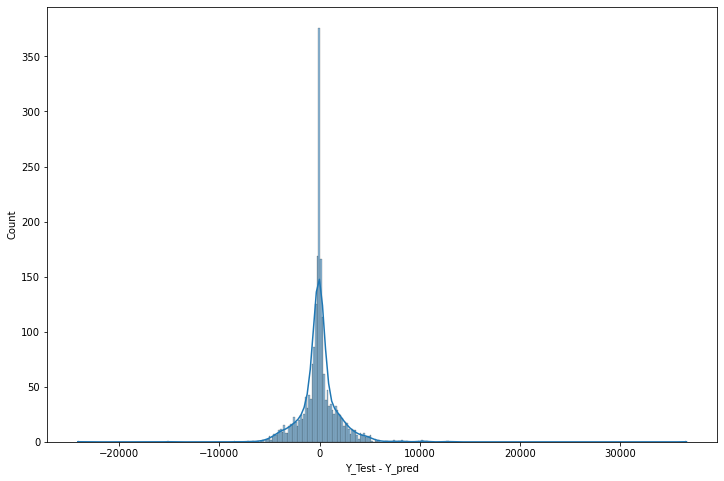

In [91]:
plt.figure(figsize = (12, 8))
sns.histplot(y_test - y_pred, kde = True)
plt.xlabel("Y_Test - Y_pred")
plt.ylabel("Count")

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print('mean_absolute_error :', mae)

mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error :', mse)

r2_scr  = r2_score(y_test, y_pred)
print('r2_score :', r2_scr)

print('Root Mean Squared Error :', np.sqrt(mse))

mean_absolute_error : 1190.3812545497449
mean_squared_error : 4454529.55420633
r2_score : 0.8005170108088434
Root Mean Squared Error : 2110.57564522249


In [93]:
rf_model.score(X_train, y_train)

0.9530979704071998

In [94]:
rf_model.score(X_test, y_test)

0.8005170108088434

# Parameter Tunning 

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid_cv = {
    'n_estimators' : range(25,200,25),
    'max_features' : ['sqrt','log'],
    'max_depth' : range(0,5,1),
    'min_samples_split' : range(0,5,1)
}

In [97]:
grid_rf = GridSearchCV(estimator=rf_model ,param_grid=grid_cv, cv=10, n_jobs=-1,verbose=1)
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 350 candidates, totalling 3500 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(0, 5),
                         'max_features': ['sqrt', 'log'],
                         'min_samples_split': range(0, 5),
                         'n_estimators': range(25, 200, 25)},
             verbose=1)

In [98]:
grid_rf.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 25}

In [99]:
RF_with_Gridsearchcv = RandomForestRegressor(max_depth= 4,
 max_features= 'sqrt',
 min_samples_split= 2,
 n_estimators= 100             
)

RF_with_Gridsearchcv.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt')

In [100]:
y_pred_with_rf = RF_with_Gridsearchcv.predict(X_test)
print("Predicted values for the Test Set\n", y_pred[:100])

Predicted values for the Test Set
 [ 5339.14533333  3646.85        7564.05        6373.07
 21306.1         8670.645       7280.46        7832.
  6422.725      12337.25416667 10092.53        4443.27
  6746.21        3966.81       10540.64595238  5374.36166667
  4363.27       12009.484      10290.44        4472.71
 10425.21        6510.53        5388.96        9177.61
  6577.77        3559.01666667  5845.19        3898.66
  5647.32        4852.59       13748.09        4797.03
 13022.78083333  9942.31       15593.89366667 13489.8475
 17137.48        7728.59        3934.28666667 11261.29833333
  6406.08        7270.72       13695.57        3991.62883333
 17231.175      12168.09907143  5242.44333333 13117.2745
  8448.2925     10843.05       36986.26        3296.84
  3652.23457143  6989.34       10851.85        7255.25
 14006.8225     11043.01        6174.53       11089.28
  8727.881      12279.23733333 15232.18        9828.66
  4861.79        9116.65666667  5287.2        14597.89
  3632.45 

In [101]:
RF_with_Gridsearchcv.score(X_train, y_train)

0.6216123031300627

In [102]:
RF_with_Gridsearchcv.score(X_test, y_test)

0.6077591749180777

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print('mean_absolute_error :', mae)

mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error :', mse)

r2_scr  = r2_score(y_test, y_pred)
print('r2_score :', r2_scr)

print('Root Mean Squared Error :', np.sqrt(mse))

mean_absolute_error : 1190.3812545497449
mean_squared_error : 4454529.55420633
r2_score : 0.8005170108088434
Root Mean Squared Error : 2110.57564522249


Observation : We have calculated the score and evaluation matrics for Linear Regression, Random Forest and Random Forest with grid serach cv.
      As per the result Random Forest is showing good score. Therefore best model for prediction is Random Forest.

# Save Model

In [105]:
import pickle

file = open('Flight_Price_Prediction.pkl', 'wb')
pickle.dump(rf_model, file)